In [10]:
from nba_api.stats.endpoints import PlayerGameLogs

# regular season players and their stats each game -> through game ID   
rs = PlayerGameLogs(
    season_nullable="2024-25",
    season_type_nullable="Regular Season"
).get_data_frames()[0]

In [11]:
po = PlayerGameLogs(
    season_nullable="2024-25",
    season_type_nullable="Playoffs"
).get_data_frames()[0]

In [12]:
import pandas as pd
raw_dataset = pd.concat([rs, po], ignore_index=True)

In [13]:
raw_dataset["GAME_DATE"] = pd.to_datetime(raw_dataset["GAME_DATE"])

In [14]:
home_col = []
for line in raw_dataset['MATCHUP']:
    team, vs, opp = line.split()
    if vs != '@':
        home_col.append(1)
    else:
        home_col.append(0)

raw_dataset['IS_HOME'] = home_col

In [15]:
raw_dataset

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,IS_HOME
0,2024-25,1631132,Christian Koloko,Christian,1610612747,LAL,Los Angeles Lakers,0022401199,2025-04-13,LAL @ POR,...,6956,18599,13450,6373,2246,150,9719,1,19:29,0
1,2024-25,1630692,Jordan Goodwin,Jordan,1610612747,LAL,Los Angeles Lakers,0022401199,2025-04-13,LAL @ POR,...,11254,9299,24566,6986,2246,150,6953,1,30:13,0
2,2024-25,1627832,Fred VanVleet,Fred,1610612745,HOU,Houston Rockets,0022401193,2025-04-13,HOU vs. DEN,...,6956,6813,25087,13445,2246,150,10339,1,27:14,1
3,2024-25,1629750,Javonte Green,Javonte,1610612739,CLE,Cleveland Cavaliers,0022401189,2025-04-13,CLE vs. IND,...,6956,13544,1948,10799,2246,150,12913,1,19:47,1
4,2024-25,1630534,Ochai Agbaji,Ochai,1610612761,TOR,Toronto Raptors,0022401197,2025-04-13,TOR @ SAS,...,11254,7553,21147,6220,2246,150,6953,1,37:31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27920,2024-25,1629018,Gary Trent Jr.,Gary,1610612749,MIL,Milwaukee Bucks,0042400131,2025-04-19,MIL @ IND,...,1090,450,1017,639,133,9,611,1,26:55,0
27921,2024-25,1642261,Dalton Knecht,Dalton,1610612747,LAL,Los Angeles Lakers,0042400161,2025-04-19,LAL vs. MIN,...,1090,975,680,1160,133,9,1108,1,3:02,1
27922,2024-25,1631105,Jalen Duren,Jalen,1610612765,DET,Detroit Pistons,0042400121,2025-04-19,DET @ NYK,...,724,830,1515,435,133,9,546,1,24:44,0
27923,2024-25,1627827,Dorian Finney-Smith,Dorian,1610612747,LAL,Los Angeles Lakers,0042400161,2025-04-19,LAL vs. MIN,...,724,1114,1348,1118,133,9,1108,1,32:30,1


In [16]:
raw_dataset = raw_dataset.sort_values(["PLAYER_ID", "GAME_DATE"])

In [17]:
raw_dataset

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,IS_HOME
26281,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400062,2024-10-22,LAL vs. MIN,...,2493,6070,18298,6182,2246,150,6431,1,34:39,1
25825,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400085,2024-10-25,LAL vs. PHX,...,2493,3254,2867,4590,2246,150,4250,1,34:42,1
25683,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400096,2024-10-26,LAL vs. SAC,...,1447,582,3250,262,1,1,173,1,33:46,1
25343,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400111,2024-10-28,LAL @ PHX,...,4218,10323,24263,7167,2246,150,7475,1,35:48,0
24831,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400118,2024-10-30,LAL @ CLE,...,1447,1579,24263,6320,2246,150,3901,1,28:58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10633,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400703,2025-02-03,MEM vs. SAS,...,17725,23200,14448,24005,2246,150,24066,1,2:03,1
10294,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400722,2025-02-05,MEM @ TOR,...,17725,23200,9394,24554,2246,150,24667,1,3:40,0
9151,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400783,2025-02-12,MEM @ LAC,...,17725,23200,11263,25228,2246,150,25259,1,0:57,0
716,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022401170,2025-04-10,MEM vs. MIN,...,17725,23200,14448,25228,2246,150,25259,1,1:28,1


In [18]:
player_id_grouping = raw_dataset.groupby("PLAYER_ID")

In [19]:
raw_dataset["PTS_PREV_GAME"] = player_id_grouping["PTS"].shift(1) # making a col for points the player had for the game before

In [20]:
raw_dataset["PTS_ROLL5"] = player_id_grouping["PTS"].shift(1).rolling(5).mean().fillna(method = "ffill")

/var/folders/v8/081kdzrn13sfkzmhcqs5_ml40000gn/T/ipykernel_12467/2004464641.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_dataset["PTS_ROLL5"] = player_id_grouping["PTS"].shift(1).rolling(5).mean().fillna(method = "ffill")


In [21]:
raw_dataset

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,IS_HOME,PTS_PREV_GAME,PTS_ROLL5
26281,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400062,2024-10-22,LAL vs. MIN,...,18298,6182,2246,150,6431,1,34:39,1,NaN,NaN
25825,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400085,2024-10-25,LAL vs. PHX,...,2867,4590,2246,150,4250,1,34:42,1,16.0,NaN
25683,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400096,2024-10-26,LAL vs. SAC,...,3250,262,1,1,173,1,33:46,1,21.0,NaN
25343,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400111,2024-10-28,LAL @ PHX,...,24263,7167,2246,150,7475,1,35:48,0,32.0,NaN
24831,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400118,2024-10-30,LAL @ CLE,...,24263,6320,2246,150,3901,1,28:58,0,11.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10633,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400703,2025-02-03,MEM vs. SAS,...,14448,24005,2246,150,24066,1,2:03,1,0.0,2.8
10294,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400722,2025-02-05,MEM @ TOR,...,9394,24554,2246,150,24667,1,3:40,0,0.0,2.0
9151,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400783,2025-02-12,MEM @ LAC,...,11263,25228,2246,150,25259,1,0:57,0,0.0,2.0
716,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022401170,2025-04-10,MEM vs. MIN,...,14448,25228,2246,150,25259,1,1:28,1,0.0,0.0


In [22]:
raw_dataset["REB_ROLL5"]  = player_id_grouping["REB"].shift(1).rolling(5).mean().fillna(method="ffill")
raw_dataset["AST_ROLL5"]  = player_id_grouping["AST"].shift(1).rolling(5).mean().fillna(method="ffill")
raw_dataset["MIN_LAG1"]   = player_id_grouping["MIN"].shift(1).fillna(method="ffill")
raw_dataset["MIN_ROLL5"]  = player_id_grouping["MIN"].shift(1).rolling(5).mean().fillna(method="ffill")

/var/folders/v8/081kdzrn13sfkzmhcqs5_ml40000gn/T/ipykernel_12467/3610321839.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_dataset["REB_ROLL5"]  = player_id_grouping["REB"].shift(1).rolling(5).mean().fillna(method="ffill")
/var/folders/v8/081kdzrn13sfkzmhcqs5_ml40000gn/T/ipykernel_12467/3610321839.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_dataset["AST_ROLL5"]  = player_id_grouping["AST"].shift(1).rolling(5).mean().fillna(method="ffill")
/var/folders/v8/081kdzrn13sfkzmhcqs5_ml40000gn/T/ipykernel_12467/3610321839.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  raw_dataset["MIN_LAG1"]   = player_id_grouping["MIN"].shift(1).fillna(method="ffill")
/var/folders/v8/081kdzrn13sfkzmhcqs5_ml40000gn/T/ipyker

In [23]:
raw_dataset

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,IS_HOME,PTS_PREV_GAME,PTS_ROLL5,REB_ROLL5,AST_ROLL5,MIN_LAG1,MIN_ROLL5
26281,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400062,2024-10-22,LAL vs. MIN,...,6431,1,34:39,1,NaN,NaN,NaN,NaN,NaN,NaN
25825,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400085,2024-10-25,LAL vs. PHX,...,4250,1,34:42,1,16.0,NaN,NaN,NaN,34.650000,NaN
25683,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400096,2024-10-26,LAL vs. SAC,...,173,1,33:46,1,21.0,NaN,NaN,NaN,34.700000,NaN
25343,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400111,2024-10-28,LAL @ PHX,...,7475,1,35:48,0,32.0,NaN,NaN,NaN,33.766667,NaN
24831,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400118,2024-10-30,LAL @ CLE,...,3901,1,28:58,0,11.0,NaN,NaN,NaN,35.800000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10633,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400703,2025-02-03,MEM vs. SAS,...,24066,1,2:03,1,0.0,2.8,0.8,1.0,2.116667,4.390000
10294,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400722,2025-02-05,MEM @ TOR,...,24667,1,3:40,0,0.0,2.0,1.0,1.2,2.050000,3.733333
9151,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400783,2025-02-12,MEM @ LAC,...,25259,1,0:57,0,0.0,2.0,1.0,1.2,3.666667,4.230000
716,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022401170,2025-04-10,MEM vs. MIN,...,25259,1,1:28,1,0.0,0.0,0.4,0.6,0.951667,2.217000


In [24]:
df = raw_dataset.dropna(subset=["PTS_ROLL5", "REB_ROLL5", "AST_ROLL5", "MIN_ROLL5"])

In [25]:
df

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,WNBA_FANTASY_PTS_RANK,AVAILABLE_FLAG,MIN_SEC,IS_HOME,PTS_PREV_GAME,PTS_ROLL5,REB_ROLL5,AST_ROLL5,MIN_LAG1,MIN_ROLL5
24642,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400137,2024-11-01,LAL @ TOR,...,943,1,36:15,0,26.0,21.2,6.8,6.6,28.966667,33.576667
24155,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400156,2024-11-04,LAL @ DET,...,1816,1,40:00,0,27.0,23.4,7.0,7.8,36.250000,33.896667
23895,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400174,2024-11-06,LAL @ MEM,...,236,1,35:25,0,20.0,23.2,7.8,8.4,40.000000,34.956667
23449,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400195,2024-11-08,LAL vs. PHI,...,548,1,33:48,1,39.0,24.6,6.4,7.6,35.416667,35.286667
22993,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400211,2024-11-10,LAL vs. TOR,...,1314,1,34:47,1,21.0,26.6,7.8,8.6,33.800000,34.886667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10633,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400703,2025-02-03,MEM vs. SAS,...,24066,1,2:03,1,0.0,2.8,0.8,1.0,2.116667,4.390000
10294,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400722,2025-02-05,MEM @ TOR,...,24667,1,3:40,0,0.0,2.0,1.0,1.2,2.050000,3.733333
9151,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400783,2025-02-12,MEM @ LAC,...,25259,1,0:57,0,0.0,2.0,1.0,1.2,3.666667,4.230000
716,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022401170,2025-04-10,MEM vs. MIN,...,25259,1,1:28,1,0.0,0.0,0.4,0.6,0.951667,2.217000


In [26]:
from nba_api.stats.static import teams
team_name_to_id = {}
for t in teams.get_teams():
    team_name_to_id[t['abbreviation']] = t['id']

In [27]:
new_col = []
for line in df['MATCHUP']:
    team, vs, opp = line.split()
    new_col.append(team_name_to_id[opp])

df['OPP_ID'] = new_col

/var/folders/v8/081kdzrn13sfkzmhcqs5_ml40000gn/T/ipykernel_12467/1377245950.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OPP_ID'] = new_col


In [28]:
df

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,AVAILABLE_FLAG,MIN_SEC,IS_HOME,PTS_PREV_GAME,PTS_ROLL5,REB_ROLL5,AST_ROLL5,MIN_LAG1,MIN_ROLL5,OPP_ID
24642,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400137,2024-11-01,LAL @ TOR,...,1,36:15,0,26.0,21.2,6.8,6.6,28.966667,33.576667,1610612761
24155,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400156,2024-11-04,LAL @ DET,...,1,40:00,0,27.0,23.4,7.0,7.8,36.250000,33.896667,1610612765
23895,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400174,2024-11-06,LAL @ MEM,...,1,35:25,0,20.0,23.2,7.8,8.4,40.000000,34.956667,1610612763
23449,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400195,2024-11-08,LAL vs. PHI,...,1,33:48,1,39.0,24.6,6.4,7.6,35.416667,35.286667,1610612755
22993,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400211,2024-11-10,LAL vs. TOR,...,1,34:47,1,21.0,26.6,7.8,8.6,33.800000,34.886667,1610612761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10633,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400703,2025-02-03,MEM vs. SAS,...,1,2:03,1,0.0,2.8,0.8,1.0,2.116667,4.390000,1610612759
10294,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400722,2025-02-05,MEM @ TOR,...,1,3:40,0,0.0,2.0,1.0,1.2,2.050000,3.733333,1610612761
9151,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400783,2025-02-12,MEM @ LAC,...,1,0:57,0,0.0,2.0,1.0,1.2,3.666667,4.230000,1610612746
716,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022401170,2025-04-10,MEM vs. MIN,...,1,1:28,1,0.0,0.0,0.4,0.6,0.951667,2.217000,1610612750


In [29]:
from nba_api.stats.endpoints import LeagueDashTeamStats

last_season_df = (
    LeagueDashTeamStats (
        season= '2023-24',
        season_type_all_star='Regular Season',
    )
    .get_data_frames()[0]
)

In [30]:
stats = last_season_df.set_index("TEAM_ID")
for col in ["W_PCT","PLUS_MINUS","DREB","STL","BLK"]:
    df[f"opp_{col.lower()}"] = df["OPP_ID"].map(stats[col])

/var/folders/v8/081kdzrn13sfkzmhcqs5_ml40000gn/T/ipykernel_12467/374969051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"opp_{col.lower()}"] = df["OPP_ID"].map(stats[col])
/var/folders/v8/081kdzrn13sfkzmhcqs5_ml40000gn/T/ipykernel_12467/374969051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"opp_{col.lower()}"] = df["OPP_ID"].map(stats[col])
/var/folders/v8/081kdzrn13sfkzmhcqs5_ml40000gn/T/ipykernel_12467/374969051.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [31]:
df

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,NICKNAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,...,REB_ROLL5,AST_ROLL5,MIN_LAG1,MIN_ROLL5,OPP_ID,opp_w_pct,opp_plus_minus,opp_dreb,opp_stl,opp_blk
24642,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400137,2024-11-01,LAL @ TOR,...,6.8,6.6,28.966667,33.576667,1610612761,0.305,-528.0,2607,634,388
24155,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400156,2024-11-04,LAL @ DET,...,7.0,7.8,36.250000,33.896667,1610612765,0.171,-747.0,2692,531,384
23895,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400174,2024-11-06,LAL @ MEM,...,7.8,8.4,40.000000,34.956667,1610612763,0.329,-574.0,2598,673,501
23449,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400195,2024-11-08,LAL vs. PHI,...,6.4,7.6,35.416667,35.286667,1610612755,0.573,250.0,2616,694,492
22993,2024-25,2544,LeBron James,LeBron,1610612747,LAL,Los Angeles Lakers,0022400211,2024-11-10,LAL vs. TOR,...,7.8,8.6,33.800000,34.886667,1610612761,0.305,-528.0,2607,634,388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10633,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400703,2025-02-03,MEM vs. SAS,...,0.8,1.0,2.116667,4.390000,1610612759,0.268,-532.0,2778,584,520
10294,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400722,2025-02-05,MEM @ TOR,...,1.0,1.2,2.050000,3.733333,1610612761,0.305,-528.0,2607,634,388
9151,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022400783,2025-02-12,MEM @ LAC,...,1.0,1.2,3.666667,4.230000,1610612746,0.622,269.0,2701,640,413
716,2024-25,1642530,Yuki Kawamura,Yuki,1610612763,MEM,Memphis Grizzlies,0022401170,2025-04-10,MEM vs. MIN,...,0.4,0.6,0.951667,2.217000,1610612750,0.683,529.0,2807,647,497


In [32]:
from nba_api.stats.endpoints import LeagueGameLog as TeamGameLog
rs = TeamGameLog(season="2024-25", season_type_all_star="Regular Season")\
        .get_data_frames()[0]
po = TeamGameLog(season="2024-25", season_type_all_star="Playoffs")\
        .get_data_frames()[0]
team_logs = pd.concat([rs, po], ignore_index=True)
team_logs["GAME_DATE"] = pd.to_datetime(team_logs["GAME_DATE"])

In [33]:
team_logs

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22024,1610612747,LAL,Los Angeles Lakers,0022400062,2024-10-22,LAL vs. MIN,W,240,42,...,31,46,22,7,8,7,22,110,7,1
1,22024,1610612752,NYK,New York Knicks,0022400061,2024-10-22,NYK @ BOS,L,240,43,...,29,34,20,2,3,12,12,109,-23,1
2,22024,1610612738,BOS,Boston Celtics,0022400061,2024-10-22,BOS vs. NYK,W,240,48,...,29,40,33,6,3,4,15,132,23,1
3,22024,1610612750,MIN,Minnesota Timberwolves,0022400062,2024-10-22,MIN @ LAL,L,240,35,...,35,47,17,4,1,16,22,103,-7,1
4,22024,1610612749,MIL,Milwaukee Bucks,0022400066,2024-10-23,MIL @ PHI,W,240,43,...,38,46,27,4,9,14,23,124,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,42024,1610612752,NYK,New York Knicks,0042400304,2025-05-27,NYK @ IND,L,240,38,...,31,44,17,7,4,17,27,121,-9,1
2608,42024,1610612750,MIN,Minnesota Timberwolves,0042400315,2025-05-28,MIN @ OKC,L,240,35,...,31,39,16,7,6,21,20,94,-30,1
2609,42024,1610612760,OKC,Oklahoma City Thunder,0042400315,2025-05-28,OKC vs. MIN,W,240,46,...,39,46,26,14,8,16,20,124,30,1
2610,42024,1610612754,IND,Indiana Pacers,0042400305,2025-05-29,IND @ NYK,L,240,30,...,32,40,20,10,7,20,22,94,-17,1


In [34]:
for_logs = team_logs.rename(columns={"TEAM_ID":"TEAM_ID","PTS":"PTS_SCORED"})
opp_logs = team_logs.rename(columns={"TEAM_ID":"OPP_ID","PTS":"PTS_ALLOWED"})[
    ["GAME_ID","OPP_ID","PTS_ALLOWED","GAME_DATE"]
]

In [35]:
team_logs = (
    for_logs
    .merge(opp_logs, on=["GAME_ID","GAME_DATE"])
    .query("TEAM_ID != OPP_ID")
    .sort_values(["TEAM_ID","GAME_DATE"])
)

In [36]:
team_logs

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,AST,STL,BLK,TOV,PF,PTS_SCORED,PLUS_MINUS,VIDEO_AVAILABLE,OPP_ID,PTS_ALLOWED
19,22024,1610612737,ATL,Atlanta Hawks,0022400064,2024-10-23,ATL vs. BKN,W,240,39,...,25,12,9,16,20,120,4,1,1610612751,116
94,22024,1610612737,ATL,Atlanta Hawks,0022400079,2024-10-25,ATL vs. CHA,W,240,39,...,25,11,9,14,28,125,5,1,1610612766,120
162,22024,1610612737,ATL,Atlanta Hawks,0022400100,2024-10-27,ATL @ OKC,L,240,36,...,24,7,4,20,23,104,-24,1,1610612760,128
188,22024,1610612737,ATL,Atlanta Hawks,0022400103,2024-10-28,ATL vs. WAS,L,240,39,...,32,12,7,16,22,119,-2,1,1610612764,121
232,22024,1610612737,ATL,Atlanta Hawks,0022400121,2024-10-30,ATL @ WAS,L,240,45,...,28,10,3,17,19,120,-13,1,1610612764,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,22024,1610612766,CHA,Charlotte Hornets,0022401133,2025-04-06,CHA vs. CHI,L,240,41,...,25,7,2,14,22,117,-14,1,1610612741,131
4729,22024,1610612766,CHA,Charlotte Hornets,0022401146,2025-04-08,CHA vs. MEM,L,240,37,...,22,3,4,15,18,100,-24,1,1610612763,124
4762,22024,1610612766,CHA,Charlotte Hornets,0022401158,2025-04-09,CHA @ TOR,L,240,36,...,23,5,3,19,13,96,-30,1,1610612761,126
4848,22024,1610612766,CHA,Charlotte Hornets,0022401174,2025-04-11,CHA @ BOS,L,240,36,...,25,7,4,17,14,94,-36,1,1610612738,130


In [37]:
grp = team_logs.groupby("TEAM_ID")

In [38]:
team_logs["DEF_LAG1"]   = grp["PTS_ALLOWED"].shift(1)

# 5‐game rolling mean of allowed points
team_logs["DEF_ROLL5"]  = grp["PTS_ALLOWED"].shift(1)\
                                    .rolling(5, min_periods=1)\
                                    .mean()

In [39]:
team_logs

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,BLK,TOV,PF,PTS_SCORED,PLUS_MINUS,VIDEO_AVAILABLE,OPP_ID,PTS_ALLOWED,DEF_LAG1,DEF_ROLL5
19,22024,1610612737,ATL,Atlanta Hawks,0022400064,2024-10-23,ATL vs. BKN,W,240,39,...,9,16,20,120,4,1,1610612751,116,NaN,NaN
94,22024,1610612737,ATL,Atlanta Hawks,0022400079,2024-10-25,ATL vs. CHA,W,240,39,...,9,14,28,125,5,1,1610612766,120,116.0,116.000000
162,22024,1610612737,ATL,Atlanta Hawks,0022400100,2024-10-27,ATL @ OKC,L,240,36,...,4,20,23,104,-24,1,1610612760,128,120.0,118.000000
188,22024,1610612737,ATL,Atlanta Hawks,0022400103,2024-10-28,ATL vs. WAS,L,240,39,...,7,16,22,119,-2,1,1610612764,121,128.0,121.333333
232,22024,1610612737,ATL,Atlanta Hawks,0022400121,2024-10-30,ATL @ WAS,L,240,45,...,3,17,19,120,-13,1,1610612764,133,121.0,121.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,22024,1610612766,CHA,Charlotte Hornets,0022401133,2025-04-06,CHA vs. CHI,L,240,41,...,2,14,22,117,-14,1,1610612741,131,125.0,111.200000
4729,22024,1610612766,CHA,Charlotte Hornets,0022401146,2025-04-08,CHA vs. MEM,L,240,37,...,4,15,18,100,-24,1,1610612763,124,131.0,115.800000
4762,22024,1610612766,CHA,Charlotte Hornets,0022401158,2025-04-09,CHA @ TOR,L,240,36,...,3,19,13,96,-30,1,1610612761,126,124.0,121.000000
4848,22024,1610612766,CHA,Charlotte Hornets,0022401174,2025-04-11,CHA @ BOS,L,240,36,...,4,17,14,94,-36,1,1610612738,130,126.0,125.000000


In [40]:
def_feats = team_logs[[
    "TEAM_ID","GAME_ID","DEF_LAG1","DEF_ROLL5"
]].rename(columns={"TEAM_ID":"OPP_ID"})

df = df.merge(def_feats,
                on=["GAME_ID","OPP_ID"],
                how="left")

In [41]:
# model testing

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split




feature_cols = ["PTS_PREV_GAME", "PTS_ROLL5", "MIN_ROLL5", "DEF_LAG1","DEF_ROLL5"]

df_sorted = df.sort_values('GAME_DATE')
X = df_sorted[feature_cols] # independent variable
Y = df_sorted['PTS'] # dependent variable

cutoff = pd.to_datetime("2025-01-01")     # choose a sensible cutoff
train_mask = df_sorted["GAME_DATE"] < cutoff
X_train = df_sorted.loc[train_mask, feature_cols]
Y_train = df_sorted.loc[train_mask, "PTS"]
X_test  = df_sorted.loc[~train_mask, feature_cols]
Y_test = df_sorted.loc[~train_mask, "PTS"]

# 7) Pipeline + hyperparameter search with TimeSeriesSplit
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("xgb", XGBRegressor(objective="reg:squarederror", verbosity=0))
])

param_dist = {
    "xgb__n_estimators":        [200, 500, 1000, 1500],
    "xgb__max_depth":           [4, 6, 8, 10],
    "xgb__learning_rate":       [0.01, 0.03, 0.05, 0.1],
    "xgb__subsample":           [0.6, 0.8, 1.0],
    "xgb__colsample_bytree":    [0.6, 0.8, 1.0],
    "xgb__min_child_weight":    [1, 3, 5],
    "xgb__gamma":               [0, 0.1, 0.3, 0.5],
}

tscv = TimeSeriesSplit(n_splits=15)

for fold, (train_idx, val_idx) in enumerate(tscv.split(X_train)):
    X_tr, X_v = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_v = Y_train.iloc[train_idx], Y_train.iloc[val_idx]

search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=20,
    scoring="neg_root_mean_squared_error",
    cv=tscv,
    n_jobs=-1,
    verbose=1,
    random_state=42
)
search.fit(X_tr, y_tr)

best_pipe = search.best_estimator_
xgb = best_pipe.named_steps["xgb"]           # extract the XGBRegressor
importances = xgb.feature_importances_       # array of importances

# Map back to column names
feat_imp = dict(zip(feature_cols, importances))
# Sort descending
sorted_imp = sorted(feat_imp.items(), key=lambda x: x[1], reverse=True)

print("Feature importances (XGB):")
for feat, imp in sorted_imp:
    print(f"  {feat:10s} → {imp:.4f}")
    
# 8) Output best parameters and CV score
print("Best params:", search.best_params_)
print("CV RMSE:", -search.best_score_) # penalizes you for larger deviations

# 9) Evaluate on the held-out test set
best_model = search.best_estimator_
preds = best_model.predict(X_v)
print("Test MAE :", mean_absolute_error(y_v, preds)) # more of a straightforward average error
# print("Test RMSE:", mean_squared_error(y_test, preds, squared=False))

Fitting 15 folds for each of 20 candidates, totalling 300 fits
Feature importances (XGB):
  PTS_PREV_GAME → 0.4825
  PTS_ROLL5  → 0.3230
  MIN_ROLL5  → 0.0977
  DEF_LAG1   → 0.0501
  DEF_ROLL5  → 0.0467
Best params: {'xgb__subsample': 0.8, 'xgb__n_estimators': 1000, 'xgb__min_child_weight': 1, 'xgb__max_depth': 4, 'xgb__learning_rate': 0.01, 'xgb__gamma': 0.1, 'xgb__colsample_bytree': 1.0}
CV RMSE: 6.497602558135986
Test MAE : 4.842143535614014


array([ 4.496503 ,  4.2828126, 14.188593 ,  9.510926 ,  3.7380438,
        5.318073 , 10.141796 ,  4.014966 ,  7.013583 ,  7.621848 ,
        4.9984856,  2.4177368,  4.4325266,  7.6726894, 13.926656 ,
       18.665743 ,  6.118286 ,  3.15907  ,  6.2757473,  8.004145 ,
       10.0940275, 10.220772 ,  3.1804624,  6.287515 , 15.115907 ,
        4.3411884, 13.776269 ,  9.54197  , 11.953503 , 22.24434  ,
        5.612561 ,  9.96875  , 11.224228 ,  2.5889833,  4.358475 ,
       25.138542 , 12.444483 , 23.74551  ,  4.24626  ,  6.0633965,
        3.0530622,  6.9554   ,  9.349484 ,  4.5607495,  3.4018407,
        7.961855 ,  8.906094 ,  7.8642316,  9.446905 , 14.078004 ,
       10.469853 , 12.283347 , 20.832983 , 11.534841 ,  5.9365263,
        8.595235 ,  4.404167 ,  4.062265 , 10.760846 , 21.743324 ,
       26.630014 ,  4.419867 ,  9.818436 , 14.341611 ,  3.7945616,
        5.2378035,  5.3341565, 20.559488 ,  3.3426127,  8.512348 ,
       14.462181 , 10.313153 ,  2.202953 , 20.45579  , 10.8927

In [51]:
from sklearn.metrics import r2_score

train_preds = best_model.predict(X_tr)
test_preds  = best_model.predict(X_v)

r2_train = r2_score(y_tr, train_preds)
r2_test  = r2_score(y_v,  test_preds)

print(f"Train  R²: {r2_train:.3f}")
print(f"Test   R²: {r2_test:.3f}")

Train  R²: 0.522
Test   R²: 0.498


In [52]:
# predict the league-average PTS for every game
import numpy as np
baseline = np.full_like(y_v, fill_value=Y_train.mean())
from sklearn.metrics import mean_absolute_error
print("Baseline MAE:", mean_absolute_error(y_v, baseline))

Baseline MAE: 7.0691244239631335


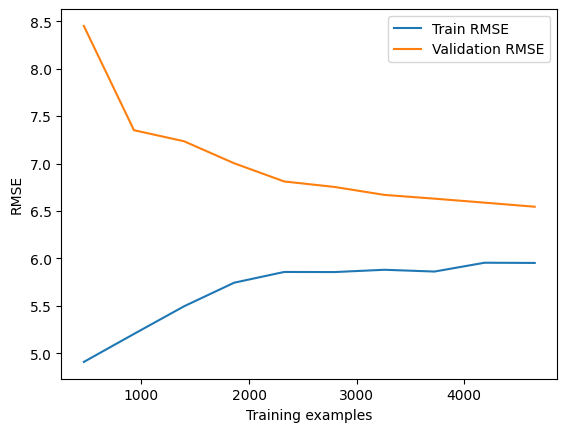

In [53]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np

# use your pipeline and the full data (X, Y)
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X, Y,
    cv=TimeSeriesSplit(n_splits=5),
    scoring="neg_root_mean_squared_error",
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# convert to RMSE
train_rmse = (-train_scores.mean(axis=1))  # already root because we used neg_root_mean_squared_error
val_rmse   = (-val_scores.mean(axis=1))

plt.plot(train_sizes, train_rmse, label="Train RMSE")
plt.plot(train_sizes, val_rmse,   label="Validation RMSE")
plt.xlabel("Training examples")
plt.ylabel("RMSE")
plt.legend()
plt.show()


In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# assume best_model is your tuned pipeline, and you have X_train, X_test, y_train, y_test
train_preds = best_model.predict(X_tr)
test_preds  = best_model.predict(X_v)

train_mae = mean_absolute_error(y_tr, train_preds)
test_mae  = mean_absolute_error(y_v,  test_preds)

print(f"Train MAE: {train_mae:.3f}   Test MAE: {test_mae:.3f}")


Train MAE: 4.703   Test MAE: 4.842


Mean bias on validation (true − pred) [quantile]: -0.040


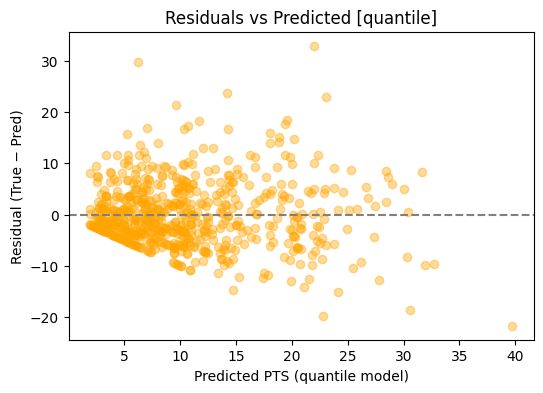

In [60]:
residuals_val = y_v - preds
mean_bias_q = residuals_val.mean()
print(f"Mean bias on validation (true − pred) [quantile]: {mean_bias_q:.3f}")
plt.figure(figsize=(6, 4))
plt.scatter(preds, residuals_val, alpha=0.4, color="orange")
plt.axhline(0, color="gray", linestyle="--")
plt.xlabel("Predicted PTS (quantile model)")
plt.ylabel("Residual (True − Pred)")
plt.title("Residuals vs Predicted [quantile]")
plt.show()

In [61]:
from joblib import dump
dump(best_model, "player_props_model.joblib")

['player_props_model.joblib']

In [1]:
from nba_api.stats.static import players
players.get_players()[0]

{'id': 76001,
 'full_name': 'Alaa Abdelnaby',
 'first_name': 'Alaa',
 'last_name': 'Abdelnaby',
 'is_active': False}

In [65]:
name_to_find = "Tyrese Haliburton"

found = False
for i in players.get_players():
    if i["full_name"] == name_to_find:
        found = True
        print(i)

if not found:
    for i in players.get_players():
        if i["first_name"] == name_to_find.split()[0]:
            found = True
            print(i)



{'id': 1630169, 'full_name': 'Tyrese Haliburton', 'first_name': 'Tyrese', 'last_name': 'Haliburton', 'is_active': True}


In [66]:
from nba_api.stats.static import teams
all_teams = teams.get_teams()
# all_teams is a list of dicts like: 
# [{'id': 1610612737, 'full_name': 'Atlanta Hawks', 'abbreviation': 'ATL', …}, …]

# find Lakers entry:
lakers_entry = [t for t in all_teams if t['full_name'] == 'Los Angeles Lakers'][0]
team_id = lakers_entry['id']
print(team_id)

1610612747


In [69]:
from nba_api.stats.endpoints import CommonTeamRoster

season_str = "2024-25"
roster_endpoint = CommonTeamRoster(team_id=team_id, season=season_str)
roster_data    = roster_endpoint.get_data_frames()[0]

In [70]:
roster_data

,TeamID,SEASON,LeagueID,PLAYER,NICKNAME,PLAYER_SLUG,NUM,POSITION,HEIGHT,WEIGHT,BIRTH_DATE,AGE,EXP,SCHOOL,PLAYER_ID,HOW_ACQUIRED
0,1610612747,2024,00,Jarred Vanderbilt,Jarred,jarred-vanderbilt,2,F,6-8,214,"APR 03, 1999",26.0,6,Kentucky,1629020,Traded from UTA on 02/09/23
1,1610612747,2024,00,Dalton Knecht,Dalton,dalton-knecht,4,F,6-6,215,"APR 19, 2001",24.0,R,Tennessee,1642261,#17 Pick in 2024 Draft
2,1610612747,2024,00,Gabe Vincent,Gabe,gabe-vincent,7,G,6-2,200,"JUN 14, 1996",28.0,5,California-Santa Barbara,1629216,Signed on 07/06/23
3,1610612747,2024,00,Bronny James,Bronny,bronny-james,9,G,6-3,210,"OCT 06, 2004",20.0,R,Southern California,1642355,#55 Pick in 2024 Draft
4,1610612747,2024,00,Christian Koloko,Christian,christian-koloko,10,C,7-0,225,"JUN 20, 2000",24.0,1,Arizona,1631132,Signed on 09/16/24
5,1610612747,2024,00,Jaxson Hayes,Jaxson,jaxson-hayes,11,C-F,7-0,220,"MAY 23, 2000",25.0,5,Texas,1629637,Signed on 07/06/23
6,1610612747,2024,00,Maxi Kleber,Maxi,maxi-kleber,14,F,6-10,240,"JAN 29, 1992",33.0,7,Bayern Munich,1628467,Traded from DAL on 02/02/25
7,1610612747,2024,00,Austin Reaves,Austin,austin-reaves,15,G,6-5,197,"MAY 29, 1998",27.0,3,Oklahoma,1630559,Signed on 08/03/21
8,1610612747,2024,00,Dorian Finney-Smith,Dorian,dorian-finney-smith,17,F,6-7,220,"MAY 04, 1993",32.0,8,Florida,1627827,Traded from BKN on 12/29/24
9,1610612747,2024,00,Shake Milton,Shake,shake-milton,20,G,6-5,205,"SEP 26, 1996",28.0,6,Southern Methodist,1629003,Traded from BKN on 12/29/24
